# PVSC 2015

This notebook contains all of the code needed to reproduce the figures found in the **PVLIB Python 2015** manuscript and poster in the 42nd IEEE PVSC. It is not intended to be a comprehensive introduction to ``pvlib-python``. 

The manuscript and poster authors are William F. Holmgren, Robert W. Andrews, Antonio T. Lorenzo,
Joshua S. Stein.

Table of Contents
1. [Setup](#Setup)
2. [Single axis tracker](#Single-axis-tracker)
2. [SAPM](#SAPM)
    2. [Parameters](#Parameters)
    2. [IV curves](#IV-curves)
    

## Setup

The essential functionality requires:
* ``matplotlib``
* ``numpy``
* ``pandas``

The plotting library ``seaborn`` is needed to reproduce the figures exactly. You'll need to comment out any ``sns`` lines if you don't install ``seaborn``.

All of these packages can be easily installed using the conda package manager. To create a new conda environment to run this notebook, run these commands in your shell:

```
$ conda create -n pvlibpvsc python matplotlib numpy pandas seaborn ipython-notebook ephem
$ source activate pvlibpvsc
$ git clone https://github.com/pvlib/pvlib-python.git
$ cd pvlib-python
$ git checkout 621ad97
$ pip install .
$ ipython-notebook
```

First, the standard scientific Python imports. 

In [17]:
# plotting modules
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
try:
    import seaborn as sns
    sns.set_style('ticks')
    sns.set_context('notebook', font_scale=1.5)
except ImportError:
    pass
    
# built in python modules
import datetime

# python add-ons
import numpy as np
import pandas as pd

Import pvlib

In [3]:
import pvlib
from pvlib.location import Location
pvlib.__version__

'0.4.5'

Make some pvlib ``Location`` objects. These objects are convenient ways to keep track of coordinates, time zones, and elevations.

In [5]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
print(tus)
abq = Location(35, -106, tz='US/Mountain', altitude=1619, name='Albuquerque')
print(abq)
johannesburg = Location(-26.2044, 28.0456, 'Africa/Johannesburg', 1753, 'Johannesburg')
print(johannesburg)

#http://dateandtime.info/citycoordinates.php?id=5913490
#https://www.distancesto.com/coordinates/ca/calgary-latitude-longitude/history/1203.html
calgary = Location(51.05, -114.0852, 'America/Edmonton', 1042, 'Calgary')
print(calgary)

Location: 
  name: Tucson
  latitude: 32.2
  longitude: -111
  altitude: 700
  tz: US/Arizona
Location: 
  name: Albuquerque
  latitude: 35
  longitude: -106
  altitude: 1619
  tz: US/Mountain
Location: 
  name: Johannesburg
  latitude: -26.2044
  longitude: 28.0456
  altitude: 1753
  tz: Africa/Johannesburg
Location: 
  name: Calgary
  latitude: 51.05
  longitude: -114.0852
  altitude: 1042
  tz: America/Edmonton


In [9]:
# Boolean to control saving the figures.
# You'll need to change the directories if you want to save them.
save = False

## Single axis tracker

Simulation of single axis tracker output near Albuquerque, NM (figure 1).

In [18]:
times = pd.date_range(start=datetime.datetime(2015,6,1), end=datetime.datetime(2015,6,2), freq='5Min')

#solpos = pvlib.solarposition.get_solarposition(times, abq)
#http://pvlib-python.readthedocs.io/en/latest/generated/pvlib.location.Location.get_solarposition.html
solpos = abq.get_solarposition(times)


tracker_data = pvlib.tracking.singleaxis(solpos['apparent_zenith'], solpos['azimuth'],
                                         axis_tilt=0, axis_azimuth=180, max_angle=45,
                                         backtrack=True, gcr=.3)

ax = tracker_data.drop('surface_azimuth', axis=1).plot()
plt.ylim(-100,100)
plt.ylabel('Angle (degrees)')
plt.title('Single Axis Tracker Simulated Angles')
sns.despine()

ax.set_xlabel('Time of day')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H', tz=solpos.index.tz))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')

if save: plt.savefig('/home/will/git_repos/pvsc2015/abq-tracker.eps', format='eps')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3296f6fd90> (for post_execute):


ValueError: year is out of range

ValueError: year is out of range

In [19]:
solpos

,apparent_elevation,apparent_zenith,azimuth,elevation,equation_of_time,zenith
2015-06-01 00:00:00,24.655035,65.344965,280.461487,24.625129,2.296045,65.374871
2015-06-01 00:05:00,23.650894,66.349106,281.093123,23.619581,2.295534,66.380419
2015-06-01 00:10:00,22.649035,67.350965,281.724027,22.616205,2.295023,67.383795
2015-06-01 00:15:00,21.649592,68.350408,282.354598,21.615122,2.294512,68.384878
2015-06-01 00:20:00,20.652701,69.347299,282.985227,20.616452,2.294001,69.383548
2015-06-01 00:25:00,19.658505,70.341495,283.616289,19.620317,2.293490,70.379683
2015-06-01 00:30:00,18.667149,71.332851,284.248155,18.626841,2.292979,71.373159
2015-06-01 00:35:00,17.678787,72.321213,284.881182,17.636149,2.292468,72.363851
2015-06-01 00:40:00,16.693578,73.306422,285.515725,16.648368,2.291956,73.351632
2015-06-01 00:45:00,15.711692,74.288308,286.152127,15.663627,2.291445,74.336373


In [20]:
tracker_data

,aoi,surface_azimuth,surface_tilt,tracker_theta
2015-06-01 00:00:00,22.038211,270.0,45.000000,45.000000
2015-06-01 00:05:00,23.179314,270.0,45.000000,45.000000
2015-06-01 00:10:00,24.320276,270.0,45.000000,45.000000
2015-06-01 00:15:00,25.461004,270.0,45.000000,45.000000
2015-06-01 00:20:00,26.601415,270.0,45.000000,45.000000
2015-06-01 00:25:00,27.741426,270.0,45.000000,45.000000
2015-06-01 00:30:00,28.880960,270.0,45.000000,45.000000
2015-06-01 00:35:00,30.019939,270.0,45.000000,45.000000
2015-06-01 00:40:00,31.158282,270.0,45.000000,45.000000
2015-06-01 00:45:00,32.295907,270.0,45.000000,45.000000


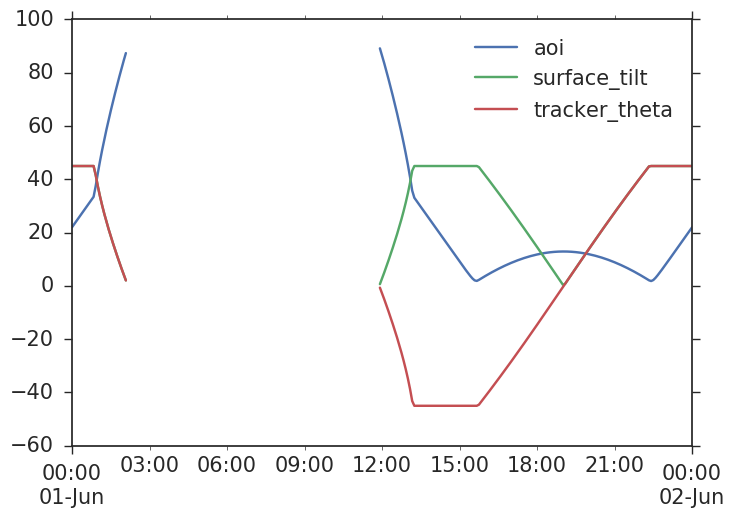

In [21]:
tracker_data.drop('surface_azimuth', axis=1).plot()


In [22]:
irrad_data = pvlib.clearsky.ineichen(times, abq)

dni_et = pd.Series(pvlib.irradiance.extraradiation(times.dayofyear, method='asce'), index=times).tz_localize(abq.tz)

ground_irrad = pvlib.irradiance.grounddiffuse(tracker_data['surface_tilt'], irrad_data['GHI'], albedo=.25)

haydavies_diffuse = pvlib.irradiance.haydavies(tracker_data['surface_tilt'], tracker_data['surface_azimuth'], 
                                                irrad_data['DHI'], irrad_data['DNI'], dni_et,
                                                solpos['apparent_zenith'], solpos['azimuth'])

global_in_plane = pvlib.irradiance.globalinplane(tracker_data['aoi'], irrad_data['DNI'], 
                                                 haydavies_diffuse, ground_irrad)
ax = global_in_plane.plot()
sns.despine()
plt.ylabel('Irradiance (W m$^{-2}$)')
plt.title('Single Axis Tracker Simulated POA Irradiance')

ax.set_xlabel('Time of day')
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H', tz=solpos.index.tz))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')

if save: plt.savefig('/home/will/git_repos/pvsc2015/abq-tracker-irrad.eps', format='eps')

TypeError: ineichen() missing 1 required positional argument: 'linke_turbidity'

## SAPM

### Parameters

Some simulations using the Sandia Array Performance Model.

Get the module database from NREL.

In [10]:
sandia_modules = pvlib.pvsystem.retrieve_sam(name='SandiaMod')
#sandia_modules

Choose a random model from another pvlib-python tutorial.

In [8]:
sandia_module = sandia_modules.Canadian_Solar_CS5P_220M___2009_
sandia_module

Vintage                                                   2009
Area                                                     1.701
Material                                                  c-Si
#Series                                                     96
#Parallel                                                    1
Isco                                                   5.09115
Voco                                                   59.2608
Impo                                                   4.54629
Vmpo                                                   48.3156
Aisc                                                  0.000397
Aimp                                                  0.000181
C0                                                     1.01284
C1                                                  -0.0128398
Bvoco                                                 -0.21696
Mbvoc                                                        0
Bvmpo                                                -0

Recalculate simulation parameters for a new location and a fixed tilt system.

In [9]:
tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
times = pd.date_range(start=datetime.datetime(2015,4,1), end=datetime.datetime(2015,4,2), freq='30s')
solpos = pvlib.solarposition.get_solarposition(times, tus)
irrad_data = pvlib.clearsky.ineichen(times, tus)

aoi = pvlib.irradiance.aoi(tus.latitude, 180, solpos['apparent_zenith'], solpos['azimuth'])
#plt.figure()
#aoi.plot()

am = pvlib.atmosphere.relativeairmass(solpos['apparent_zenith'])

# a hot, sunny spring day in the desert. no wind.
temps = pvlib.pvsystem.sapm_celltemp(irrad_data['GHI'], 0, 30)

sapm_1 = pvlib.pvsystem.sapm(sandia_module, irrad_data['DNI']*np.cos(np.radians(aoi)),
                     irrad_data['DHI'], temps['tcell'], am, aoi)
#sapm_1.head()

Make a reusable plotting function to generate a nice panel.

In [10]:
def plot_sapm(sapm_data, figsize=(16,10)):
    """
    Makes a nice figure with the SAPM data.
    
    Parameters
    ----------
    sapm_data : DataFrame
        The output of ``pvsystem.sapm``
    """
    fig, axes = plt.subplots(2, 3, figsize=figsize, sharex=False, sharey=False, squeeze=False)
    plt.subplots_adjust(wspace=.3, hspace=.4)

    ax = axes[0,0]
    sapm_data.filter(like='I').plot(ax=ax)
    ax.set_ylabel('Current (A)')

    ax = axes[0,1]
    sapm_data.filter(like='V').plot(ax=ax)
    ax.set_ylabel('Voltage (V)')

    ax = axes[0,2]
    sapm_data.filter(like='P').plot(ax=ax)
    ax.set_ylabel('Power (W)')
    
    # x axis formatting
    [ax.set_xlabel('Time of day') for ax in axes[0,:]]
    [ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H', tz=sapm_data.index.tz)) for ax in axes[0,:]]
    [plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center') for ax in axes[0,:]]

    ax = axes[1,0]
    [ax.plot(sapm_data['Ee'], current, label=name) for name, current in sapm_data.filter(like='I').items()]
    ax.set_ylabel('Current (A)')
    ax.set_xlabel('Effective Irradiance')
    ax.legend(loc=2)

    ax = axes[1,1]
    [ax.plot(sapm_data['Ee'], voltage, label=name) for name, voltage in sapm_data.filter(like='V').items()]
    ax.set_ylabel('Voltage (V)')
    ax.set_xlabel('Effective Irradiance')
    ax.legend(loc=4)

    ax = axes[1,2]
    ax.plot(sapm_data['Ee'], sapm_data['Pmp'], label='Pmp')
    ax.set_ylabel('Power (W)')
    ax.set_xlabel('Effective Irradiance')
    ax.legend(loc=2)

    # needed to show the time ticks
    for ax in axes.flatten():
        for tk in ax.get_xticklabels():
            tk.set_visible(True)
    
    return fig

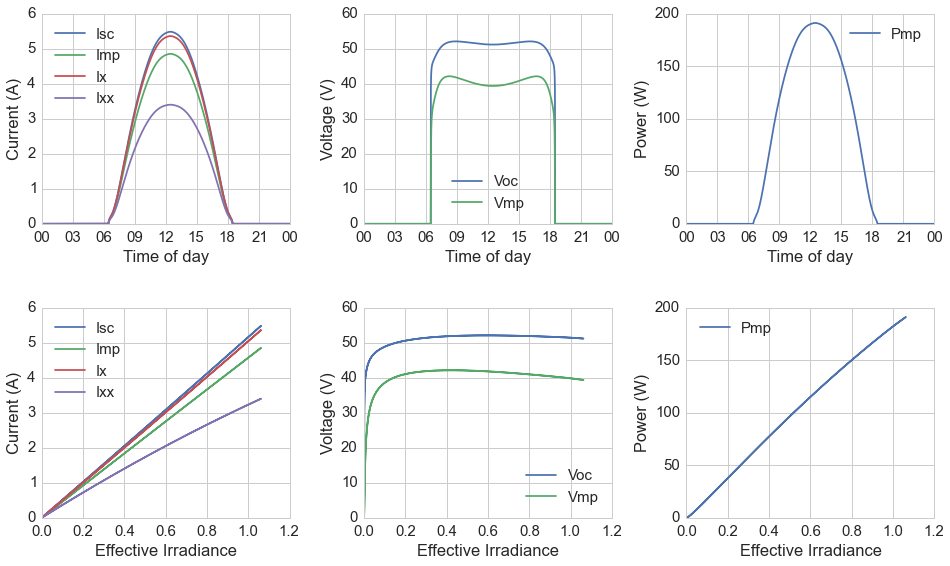

In [11]:
with sns.axes_style('whitegrid'):
    fig = plot_sapm(sapm_1)
    #sns.despine(fig=fig)
    if save: fig.savefig('/home/will/git_repos/pvsc2015/fixed_sapm.eps', format='eps')

### IV curves

Make some IV curves based on this data

In [12]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

Define a couple of functions to take the DataFrame 5 point model input and turn it into a smooth curve.

In [13]:
def sapm_to_ivframe(sapm_row):
    pnt = sapm_row.T.ix[:,0]

    ivframe = {'Isc': (pnt['Isc'], 0),
              'Pmp': (pnt['Imp'], pnt['Vmp']),
              'Ix': (pnt['Ix'], 0.5*pnt['Voc']),
              'Ixx': (pnt['Ixx'], 0.5*(pnt['Voc']+pnt['Vmp'])),
              'Voc': (0, pnt['Voc'])}
    ivframe = pd.DataFrame(ivframe, index=['current', 'voltage']).T
    ivframe = ivframe.sort('voltage')
    
    return ivframe

def ivframe_to_ivcurve(ivframe, points=100):
    ivfit_coefs = np.polyfit(ivframe['voltage'], ivframe['current'], 30)
    fit_voltages = np.linspace(0, ivframe.ix['Voc', 'voltage'], points)
    fit_currents = np.polyval(ivfit_coefs, fit_voltages)
    
    return fit_voltages, fit_currents

Pick out a handful of times for which to make the IV curves.

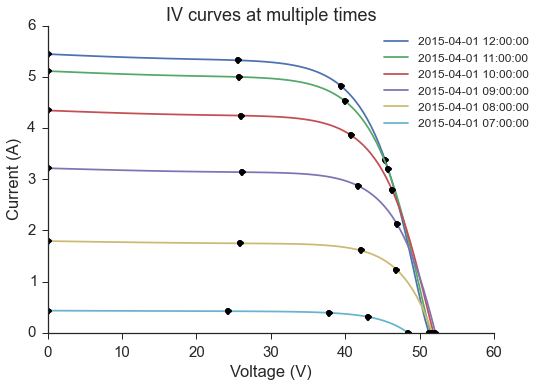

In [14]:
times = ['2015-04-01 07:00:00', '2015-04-01 08:00:00', '2015-04-01 09:00:00', 
         '2015-04-01 10:00:00', '2015-04-01 11:00:00', '2015-04-01 12:00:00']
times.reverse()

fig, ax = plt.subplots(1, 1)

for time in times:
    ivframe = sapm_to_ivframe(sapm_1[time])

    fit_voltages, fit_currents = ivframe_to_ivcurve(ivframe)

    ax.plot(fit_voltages, fit_currents, label=time)
    ax.plot(ivframe['voltage'], ivframe['current'], 'ko') # comment/uncomment to plot actual pnts
    
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_ylim(0, None)
ax.set_title('IV curves at multiple times')
ax.legend(bbox_to_anchor=(1.1,1), fontsize=12)
sns.despine()

if save: fig.savefig('/home/will/git_repos/pvsc2015/fixed_sapm_iv.eps', format='eps')